Saving data_from_mysql_where_g16.csv to data_from_mysql_where_g16 (2).csv
{'data_from_mysql_where_g16 (2).csv': b'id,timestamp,groupid,from_mac,to_mac,sensorvalue_a,sensorvalue_b,sensorvalue_c,sensorvalue_d,sensorvalue_e,sensorvalue_f\r\n39,2024-11-14 12:30:54,16,0,0,1510.0,1405.0,1812.0,0.0,0.0,0\r\n40,2024-11-14 12:30:54,16,0,0,1503.0,1413.0,1818.0,0.0,0.0,0\r\n41,2024-11-14 12:30:54,16,0,0,1511.0,1416.0,1814.0,0.0,0.0,0\r\n42,2024-11-14 12:30:55,16,0,0,1509.0,1412.0,1814.0,0.0,0.0,0\r\n43,2024-11-14 12:30:56,16,0,0,1505.0,1410.0,1804.0,0.0,0.0,0\r\n44,2024-11-14 12:30:56,16,0,0,1511.0,1413.0,1809.0,0.0,0.0,0\r\n45,2024-11-14 12:30:57,16,0,0,1507.0,1412.0,1809.0,0.0,0.0,0\r\n46,2024-11-14 12:30:57,16,0,0,1508.0,1414.0,1813.0,0.0,0.0,0\r\n47,2024-11-14 12:30:58,16,0,0,1500.0,1405.0,1814.0,0.0,0.0,0\r\n1289,2024-11-25 10:39:42,16,0,0,1512.0,1406.0,1813.0,0.0,0.0,0\r\n1290,2024-11-25 10:39:43,16,0,0,1513.0,1406.0,1817.0,0.0,0.0,0\r\n1291,2024-11-25 10:39:43,16,0,0,1506.0,1406.0,1811.0,0

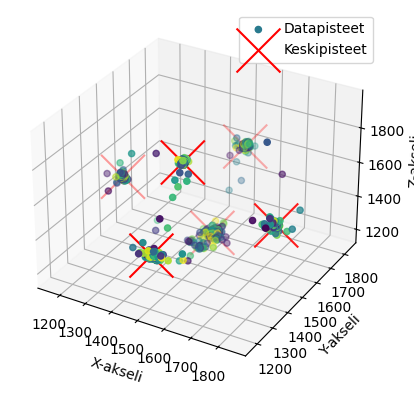


keskipisteet.h luotu.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
from mpl_toolkits.mplot3d import Axes3D

'''
# Esimerkki
testidata = np.zeros((10,3))
print(testidata)
for i in range (3):
  testidata[i,:] = np.array((10,5,5))

print(testidata)
'''

 #Ladataan tiedosto omalta koneelta
uploaded = files.upload()
print(uploaded)

# Funktio kahden 3D-pisteen välisen etäisyyden laskemiseen
def etaisyys_3d(piste1, piste2):
    piste1 = np.array(piste1)
    piste2 = np.array(piste2)
    etaisyys = np.linalg.norm(piste1 - piste2)
    return etaisyys

# Excel-tiedosto Pandas DataFrameen
data = pd.read_csv('data_from_mysql_where_g16.csv')

x = data['sensorvalue_a']
y = data['sensorvalue_b']
z = data['sensorvalue_c']

# Selvitetään kuinka monta triplettiä (x, y, z) löytyy
numberOfRows = len(data)
print(f"\nTiedostosta löytyy {numberOfRows} triplettiä (x, y, z).")

# Lasketaan minimi- ja maksimiarvot
min_vals = data[['sensorvalue_a', 'sensorvalue_b', 'sensorvalue_c']].min()
max_vals = data[['sensorvalue_a', 'sensorvalue_b', 'sensorvalue_c']].max()

print("\nMinimiarvot:\n", min_vals)
print("\nMaksimiarvot:\n", max_vals)

# Data, joka syötetään K-means algoritmiin
# Skaalattu data syötetään K-means algoritmiin
# .T Transponoi matriisin, eli vaihtaa sen rivit ja sarakkeet keskenään
#data_values = np.array([x, y, z]).T

# Arvotaan keskikohdat satunnaisesti
n_clusters = 6  # Määritellään, kuinka monta klusteria
#random_centroids = np.random.rand(n_clusters, 3)  # Arvotaan n_clusters kappaletta satunnaisia pisteitä
random_centroids = np.random.uniform(low=min_vals.values, high=max_vals.values, size=(n_clusters, len(min_vals)))
#random_centroids[:, 0] *= x_max  # Skaalataan x-arvot
#random_centroids[:, 1] *= y_max  # Skaalataan y-arvot
#random_centroids[:, 2] *= z_max  # Skaalataan z-arvot

# Tulostetaan satunnaisesti arvotut keskipisteet
print("\nSatunnaisesti arvotut keskipisteet: ", random_centroids)

centerPointCumulativeSum = np.zeros_like(random_centroids)  # 6 riviä, 3 saraketta
Counts = np.zeros(n_clusters)  # 1 rivi, 6 saraketta
Distances = np.zeros((n_clusters))

# Ulompi for-looppi käy läpi kaikki datapisteet
# Lasketaan jokaisen datapisteen etäisyys kaikkiin keskipisteisiin
# Selvitetään lähin keskipiste (argmin) ja lisätään pisteen koordinaatit kyseisen keskipisteen kumulatiiviseen summaan.
# Laskuri (Counts) kertoo, montako pistettä kuuluu kuhunkin klusteriin.
for i in range(numberOfRows):
    # Lasketaan etäisyydet nykyisestä datapisteestä (x[i], y[i], z[i]) kaikkiin keskipisteisiin
    for j in range(n_clusters):
        # Lasketaan euklidinen etäisyys
        distance = np.linalg.norm(np.array([x[i], y[i], z[i]]) - random_centroids[j])
        Distances[j] = distance

     # Selvitetään, mikä keskipiste on lähimpänä
    closest_centroid_index = np.argmin(Distances)

    # Päivitetään kumulatiiviset summat ja laskurit
    centerPointCumulativeSum[closest_centroid_index] += np.array([x[i], y[i], z[i]])
    Counts[closest_centroid_index] += 1

# Tulostetaan lopputulos
print("\nKeskipisteiden kumulatiiviset summat:\n", centerPointCumulativeSum)
print("\nKeskipisteiden datapisteiden laskurit:\n", Counts)

# Step 2: Päivitetään keskipisteet voittaneiden pisteiden perusteella
# Päivitetään keskipisteet laskemalla niiden uusi sijainti datapisteiden keskiarvona.
# Jos keskipiste ei saanut yhtään pistettä, se arvotaan uudestaan satunnaisesti.
for i in range(n_clusters):
    if Counts[i] > 0:
        random_centroids[i] = centerPointCumulativeSum[i] / Counts[i]
    else:
        # Jos ei yhtään voitettua pistettä, arvotaan uusi keskipiste
        random_centroids[i] = np.random.uniform(low=min_vals.values, high=max_vals.values)

# Toistetaan niin kauan, että keskipisteet eivät liiku
tolerance = 1e-5  # Toleranssi liikkeelle
iteration = 0
max_iterations = 100
previous_centroids = np.copy(random_centroids)

# Algoritmia toistetaan niin kauan, kunnes keskipisteiden liike on alle määritellyn toleranssin (1e−5),
# tai enimmäisiterointi (100) saavutetaan.
while iteration < max_iterations:
    iteration += 1
    # Lasketaan etäisyydet ja päivitetään keskipisteet
    centerPointCumulativeSum.fill(0)
    Counts.fill(0)

    for i in range(numberOfRows):
        # Lasketaan etäisyydet nykyisestä datapisteestä (x[i], y[i], z[i]) kaikkiin keskipisteisiin
        for j in range(n_clusters):
          # Lasketaan euklidinen etäisyys
          distance = np.linalg.norm(np.array([x[i], y[i], z[i]]) - random_centroids[j])
          Distances[j] = distance

        # Selvitetään, mikä keskipiste on lähimpänä
        closest_centroid_index = np.argmin(Distances)
         # Päivitetään kumulatiiviset summat ja laskurit
        centerPointCumulativeSum[closest_centroid_index] += np.array([x[i], y[i], z[i]])
        Counts[closest_centroid_index] += 1

    # Päivitetään keskipisteet
    for i in range(n_clusters):
        if Counts[i] > 0:
            random_centroids[i] = centerPointCumulativeSum[i] / Counts[i]
        else:
            random_centroids[i] =  np.random.uniform(low=min_vals.values, high=max_vals.values)

    # Tarkistetaan, ovatko keskipisteet muuttuneet
    if np.all(np.linalg.norm(random_centroids - previous_centroids, axis=1) < tolerance):
        break
    previous_centroids = np.copy(random_centroids)

print("\nKeskipisteet on päivitetty.")

# 3D-plottaus
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# pisteet 3D-avaruudessa
colors = np.random.rand(numberOfRows)
ax.scatter(x, y, z, c=colors, zorder=1, cmap='viridis', label='Datapisteet')
ax.set_xlabel('X-akseli')
ax.set_ylabel('Y-akseli')
ax.set_zlabel('Z-akseli')


# Korostetaan keskipisteet punaisella
ax.scatter(random_centroids[:, 0], random_centroids[:, 1], random_centroids[:, 2], c='r', marker='x', zorder = 100, s=1000, label='Keskipisteet')

# otsikot ja akselit
ax.set_xlabel('X-akseli')
ax.set_ylabel('Y-akseli')
ax.set_zlabel('Z-akseli')

ax.legend()

# Näytetään kuva
plt.show()

# Näytä keskipisteet C-muodossa
with open("keskipisteet.h", "w") as f:
    f.write("int CP[6][3] = {\n")
    for centroid in random_centroids:
        f.write("{" + ", ".join(map(str, map(int, centroid))) + "},\n")
    f.write("};\n")

print("\nkeskipisteet.h luotu.")


In [10]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Ladataan data CSV-tiedostosta
data = pd.read_csv('data_from_mysql_where_g16.csv')
x = data[['sensorvalue_a', 'sensorvalue_b', 'sensorvalue_c']].values
y = data['sensorvalue_d'].values.reshape(-1, 1)  # Suuntatieto luokitteluun

# One-hot-enkoodaus suuntatiedolle (6 luokkaa)
encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(y).toarray()

# Datajaon teko (80% treeniin, 20% testiin)
x_train, x_test, y_train, y_test = train_test_split(x, y_encoded, test_size=0.2, random_state=42)

# Rakennetaan yksinkertainen neuroverkko
model = Sequential([
    Dense(16, activation='relu', input_shape=(3,)),  # Syötekerros (x, y, z)
    Dense(16, activation='relu'),                   # Piilokerros
    Dense(7, activation='softmax')                  # Ulostulokerros (6 luokkaa)
])

# Käännetään malli
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Mallin opetus
model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

# Testataan tarkkuus
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Mallin tarkkuus: {accuracy*100:.2f}%")

# Tallennetaan painot ja bias-arvot
weights_biases = {}
for layer in model.layers:
    weights_biases[layer.name] = layer.get_weights()

# Tallenna tiedot neuroverkon parametreista tiedostoon
np.save("weights_biases.npy", weights_biases)
print("\nPainot ja bias-arvot tallennettu.")


import numpy as np

# Ladataan tallennetut painot ja bias-arvot
weights_biases = np.load("weights_biases.npy", allow_pickle=True).item()

# Esimerkki syöte (x, y, z)
input_data = np.array([0.5, 0.2, -0.1])

# Forward pass -funktio
def forward_pass(input_data, weights_biases):
    output = input_data
    for layer, params in weights_biases.items():
        weights, biases = params
        output = np.dot(output, weights) + biases
        if 'relu' in layer:
            output = np.maximum(0, output)  # ReLU-aktivointi
        elif 'softmax' in layer:
            exp_values = np.exp(output - np.max(output))
            output = exp_values / np.sum(exp_values)
    return output

# Laske tulos
result = forward_pass(input_data, weights_biases)
print("Neuroverkon laskettu tulos:", result)

import numpy as np

# Ladataan tallennetut painot ja bias-arvot
weights_biases = np.load("weights_biases.npy", allow_pickle=True).item()

# Esimerkki syöte (x, y, z)
input_data = np.array([0.5, 0.2, -0.1])

# Forward pass -funktio
def forward_pass(input_data, weights_biases):
    output = input_data
    for layer, params in weights_biases.items():
        weights, biases = params
        output = np.dot(output, weights) + biases
        if 'relu' in layer:
            output = np.maximum(0, output)  # ReLU-aktivointi
        elif 'softmax' in layer:
            exp_values = np.exp(output - np.max(output))
            output = exp_values / np.sum(exp_values)
    return output

# Laske tulos
result = forward_pass(input_data, weights_biases)
print("Neuroverkon laskettu tulos:", result)

# Luo tiedosto C-muodossa
with open("neuroverkonKertoimet.h", "w") as f:
    for layer, params in weights_biases.items():
        weights, biases = params
        f.write(f"// {layer}\n")
        f.write("float weights_" + layer + "[] = {")
        f.write(", ".join(map(str, weights.flatten())) + "};\n")
        f.write("float biases_" + layer + "[] = {")
        f.write(", ".join(map(str, biases)) + "};\n")



Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1947 - loss: 137.3375 - val_accuracy: 0.4184 - val_loss: 3.3582
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4123 - loss: 3.2116 - val_accuracy: 0.4670 - val_loss: 2.5408
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4359 - loss: 2.7667 - val_accuracy: 0.5000 - val_loss: 2.4111
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4880 - loss: 2.5801 - val_accuracy: 0.4983 - val_loss: 2.7060
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4969 - loss: 1.9394 - val_accuracy: 0.3403 - val_loss: 2.0722
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4939 - loss: 2.1837 - val_accuracy: 0.4983 - val_loss: 1.5789
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5470 - loss: 1.4180 - val_accuracy: 0.5938 - val_loss: 1.4362
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5302 - loss: 1.3996 - val_accuracy: 0.5625 - val_loss: 1.5077
E

In [9]:
print(y_train.shape)
print(y_test.shape)
print(np.unique(y_train))
print(np.unique(y_test))


(2300, 7)
(576, 7)
[0. 1.]
[0. 1.]
